In [ ]:
#angular_momentum_flux.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 June 2018.
#this...

In [51]:
#set input parameters
number_of_streamlines = 2
particles_per_streamline = 1001
radial_width = 1.0e-3
total_ring_mass = 1.5e-9
G_ring = 1.0
shear_viscosity = 6.0e-13
Q_ring = -1.0
Rp = 0.5
J2 = 0.01
e = 5.0e-3
import numpy as np
adedas = [0.0, 0.25, 0.5, np.sqrt(3.0)/2, 0.9]
from helper_fns import *

In [49]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [52]:
delta_omega_list = []
t0_list = []
for adeda in adedas:
    initial_orbits = {'shape':'eccentric', 'e':e, 'adeda':adeda}
    #initialize streamlines
    r, t, vr, vt, lambda0, c = initialize_streamline(number_of_streamlines, 
        particles_per_streamline, radial_width, total_ring_mass, G_ring, Q_ring, 
        shear_viscosity, J2, Rp, initial_orbits)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    #recompute r,t in coordinate system that co-rotates with inner streamline's peri
    r, t, vr, vt, wt = peri_corotate(r, t, vr, vt, wt)
    #differential angular velocity vesus inner streamline's longitude
    omega = vt/r
    delta_omega_list += [omega[1] - omega[0]]
    t0_list += [t[0]]

this lambda-check should equal one =  1.0
this lambda-check should equal one =  1.0
this lambda-check should equal one =  1.0
this lambda-check should equal one =  1.0
this lambda-check should equal one =  1.0


NameError: global name 't' is not defined

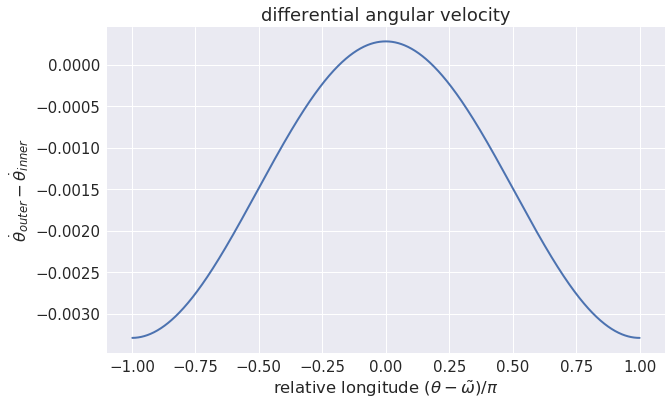

In [47]:
#viscous flux vs longitude
x = t0/np.pi
y = delta_omega
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='')
p = ax.set_title('differential angular velocity')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'$\dot{\theta}_{outer} - \dot{\theta}_{inner}$')
p = plt.legend()